### Zastosowanie algorytmu k-średnich w segmentacji obrazu. 

Jednym z popularnych zastosowań algorytmu k-means jest segmentacja obrazu.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
img = cv2.imread('data/img1.jpg')  # wczytujemy obraz
img.shape  # zdjęcie kolorowe

(470, 648, 3)

In [3]:
img

array([[[204, 193, 185],
        [203, 192, 184],
        [204, 192, 182],
        ...,
        [208, 201, 192],
        [208, 201, 192],
        [208, 201, 192]],

       [[202, 191, 183],
        [201, 190, 182],
        [202, 190, 180],
        ...,
        [208, 201, 192],
        [208, 201, 192],
        [208, 201, 192]],

       [[200, 189, 181],
        [199, 188, 180],
        [200, 188, 178],
        ...,
        [208, 201, 192],
        [208, 201, 192],
        [208, 201, 192]],

       ...,

       [[ 59, 104,  95],
        [ 29,  74,  65],
        [ 33,  80,  71],
        ...,
        [ 76, 144, 127],
        [ 62, 130, 113],
        [ 74, 142, 125]],

       [[ 88, 135, 126],
        [ 60, 107,  98],
        [ 58, 105,  96],
        ...,
        [ 61, 127, 108],
        [ 38, 104,  85],
        [ 42, 108,  89]],

       [[ 86, 133, 124],
        [ 69, 116, 107],
        [ 71, 118, 109],
        ...,
        [ 50, 117,  96],
        [ 24,  90,  71],
        [ 23,  89,  70]]

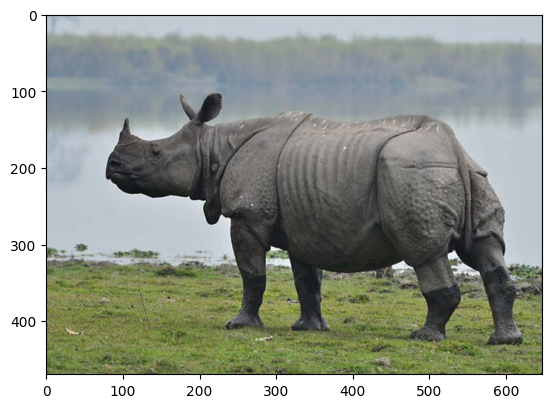

In [4]:
# wyświetlamy
plt.imshow(img[:,:,::-1])  # numpy i matplotlib mają odwrotną kolejność kanałów

Zróbmy z tego ndarray trzykolumnowy dataframe, po jednej kolumnie na każdy kanał.

In [5]:
# przygotowanie obrazu do modelu
img_data = img.reshape((-1, 3))  # zmieniamy kształt
img_data = np.float32(img_data)  # konwertujemy do float32
img_data.shape

(304560, 3)

In [6]:
df = pd.DataFrame(data=img_data, columns=['dim1', 'dim2', 'dim3'])
df

,dim1,dim2,dim3
0,204.0,193.0,185.0
1,203.0,192.0,184.0
2,204.0,192.0,182.0
3,205.0,193.0,181.0
4,208.0,194.0,182.0
...,...,...,...
304555,62.0,130.0,105.0
304556,64.0,131.0,110.0
304557,50.0,117.0,96.0
304558,24.0,90.0,71.0


Tym razem nie użyjemy klasy KMeans biblioteki scikit-learn, tylko funkcji kmeans biblioteki openCV

In [7]:
# popatrzmy na nią
cv2.kmeans?

# parametry na wejściu
# data 
# K - liczba klastrów
# bestLabels - etykiety
# criteria - warunek stopu
# attempts - liczba uruchomień algorytmu

# dostajemy trzy wartości
# compactness = wss
# labels = etykiety: '1', '2', ...
# centers = centroidy

Docstring:
kmeans(data, K, bestLabels, criteria, attempts, flags[, centers]) -> retval, bestLabels, centers
.   @brief Finds centers of clusters and groups input samples around the clusters.
.   
.   The function kmeans implements a k-means algorithm that finds the centers of cluster_count clusters
.   and groups the input samples around the clusters. As an output, \f$\texttt{bestLabels}_i\f$ contains a
.   0-based cluster index for the sample stored in the \f$i^{th}\f$ row of the samples matrix.
.   
.   @note
.   -   (Python) An example on K-means clustering can be found at
.       opencv_source_code/samples/python/kmeans.py
.   @param data Data for clustering. An array of N-Dimensional points with float coordinates is needed.
.   Examples of this array can be:
.   -   Mat points(count, 2, CV_32F);
.   -   Mat points(count, 1, CV_32FC2);
.   -   Mat points(1, count, CV_32FC2);
.   -   std::vector\<cv::Point2f\> points(sampleCount);
.   @param K Number of clusters to split the set by.

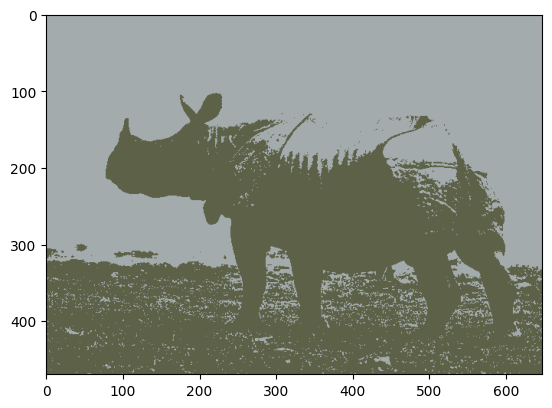

In [8]:
# uruchamiamy
_, label, center = cv2.kmeans(
    data=img_data,  # float32 data type
    K=2,            # liczba klastrów
    bestLabels=None,
    criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0),  # kryterium zatrzymania (typ, max_iter, eps)
    attempts=10,    # liczba uruchomień algorytmu 
    flags=cv2.KMEANS_RANDOM_CENTERS
)    # określenie inicjalizacji centroidów (losowe)

center = np.uint8(center)
res = center[label.flatten()]
res = res.reshape((img.shape))
plt.imshow(res[:,:,::-1])

In [9]:
# Napiszmy funkcję, która pozwoli nam cały ten proces zautomatyzować

def make_kmeans(img_name: str, cluster_nr: int = 2) -> None:

    # wczytanie zdjęcia
    img = cv2.imread(img_name)
    plt.imshow(img[:,:,::-1])
    plt.show()
    
    # przygotowanie zdjęcia
    img_data = img.reshape((-1, 3))
    img_data = np.float32(img_data)

    # kmeans
    _, label, center = cv2.kmeans(
        data=img_data, 
        K=cluster_nr, 
        bestLabels=None,
        criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0), 
        attempts=10, 
        flags=cv2.KMEANS_RANDOM_CENTERS)

    # przygotowanie do wyświetlenia
    center = np.uint8(center)
    res = center[label.flatten()]
    res = res.reshape((img.shape))
    plt.imshow(res[:,:,::-1])
    plt.show()

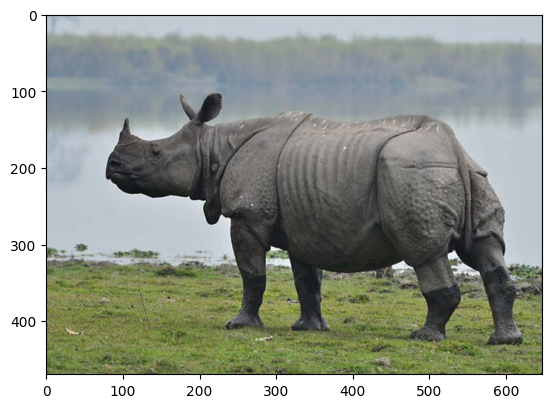

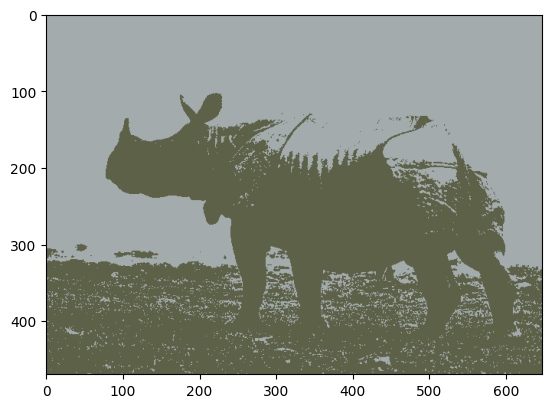

In [10]:
make_kmeans("data/img1.jpg")

Do czego możemy używać ?

1. detekcja obiektów

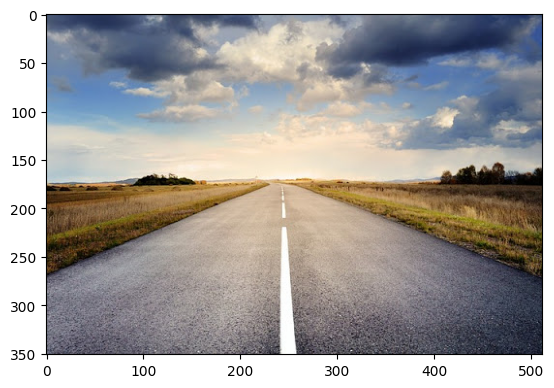

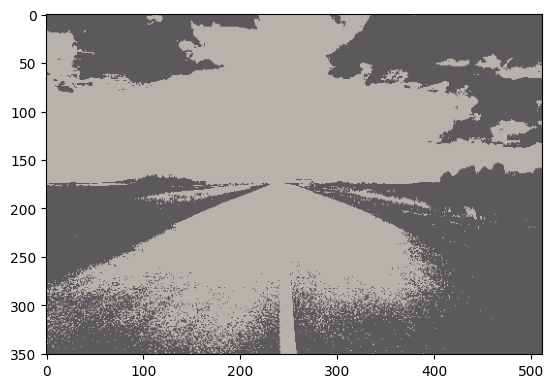

In [11]:
make_kmeans("data/img2.jpg")

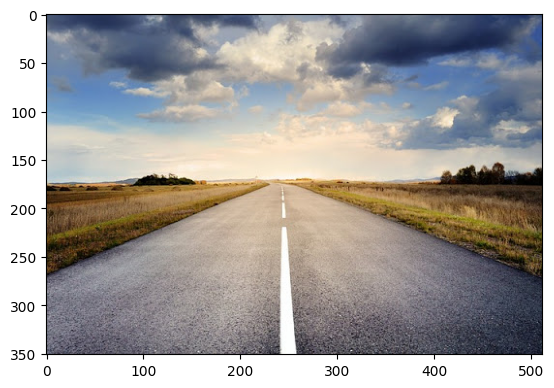

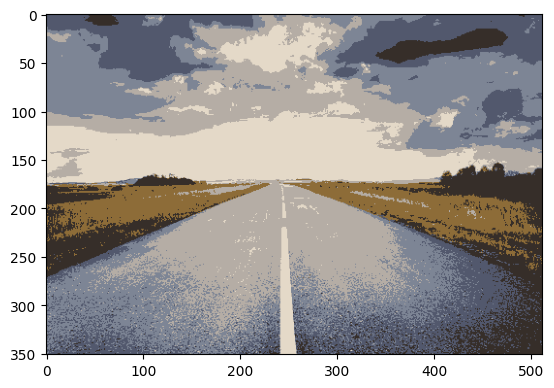

In [12]:
make_kmeans("data/img2.jpg", 6)

2. Kompresja obrazu

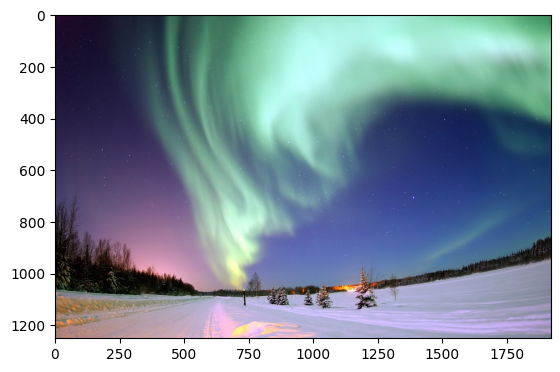

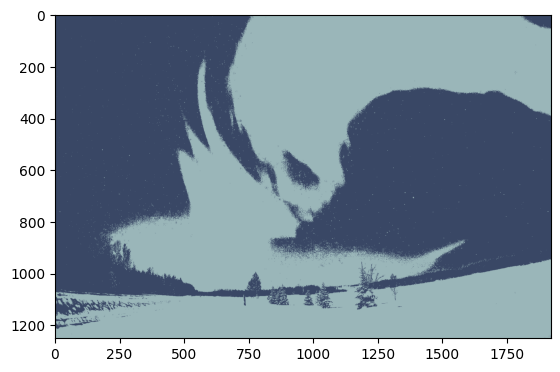

In [13]:
make_kmeans("data/img3.jpg")

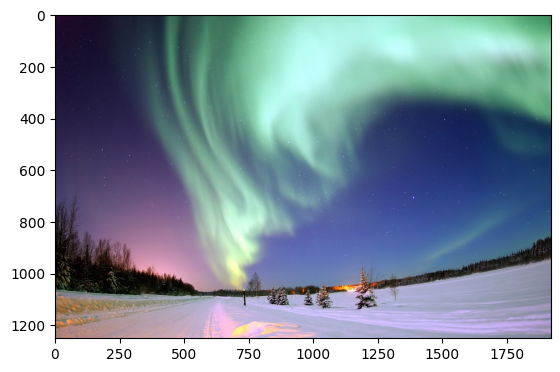

Liczba klastrów: 2


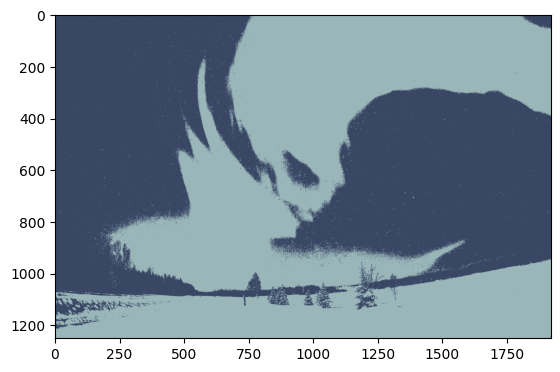

Liczba klastrów: 6


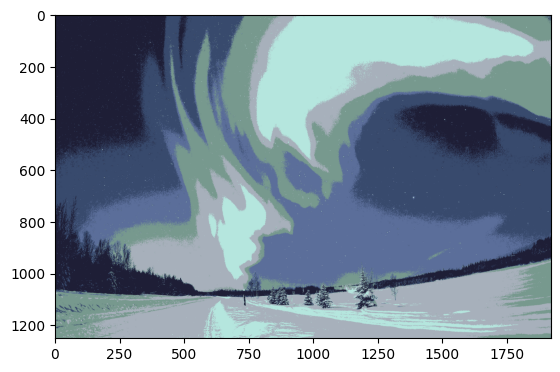

Liczba klastrów: 10


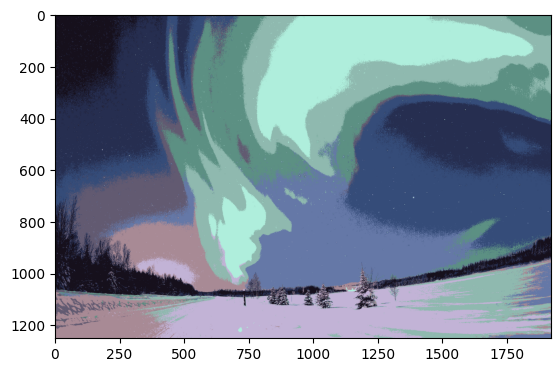

Liczba klastrów: 14


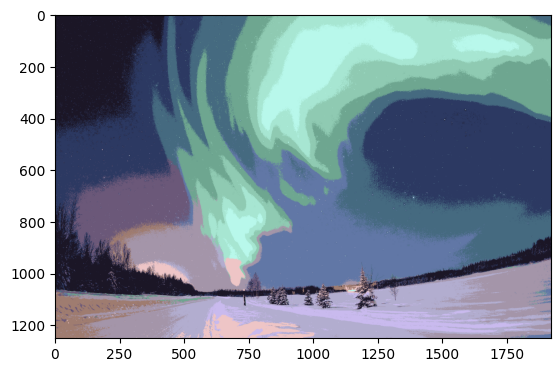

Liczba klastrów: 18


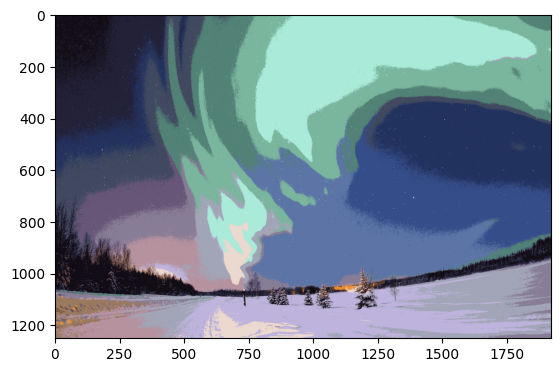

In [14]:
# Popatrzmy od 2 do 20

# wczytanie zdjęcia
img = cv2.imread('data/img3.jpg')
plt.imshow(img[:,:,::-1])
plt.show()

# przygotowanie zdjęcia
img_data = img.reshape((-1, 3))
img_data = np.float32(img_data)

for cluster_nr in range(2, 20, 4):
    print(f"Liczba klastrów: {cluster_nr}")
    _, label, center = cv2.kmeans(
        data=img_data,  # float32 data type
        K=cluster_nr,            # liczba klastrów
        bestLabels=None,
        criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0),  # kryterium zatrzymania (typ, max_iter, eps)
        attempts=10,    # liczba uruchomień algorytmu 
        flags=cv2.KMEANS_RANDOM_CENTERS
    )    # określenie inicjalizacji centroidów (losowe)
    
    center = np.uint8(center)
    res = center[label.flatten()]
    res = res.reshape((img.shape))
    plt.imshow(res[:,:,::-1])
    plt.show()

3. Konwersja obrazu (wstępne przetwarzanie)

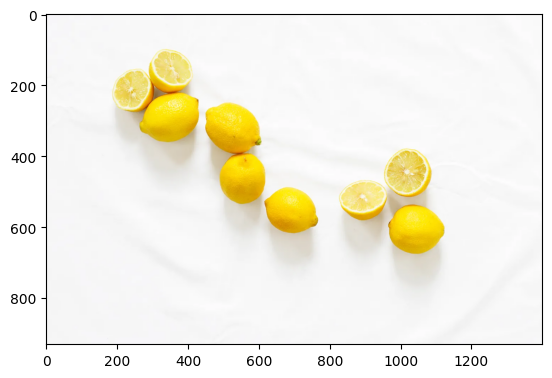

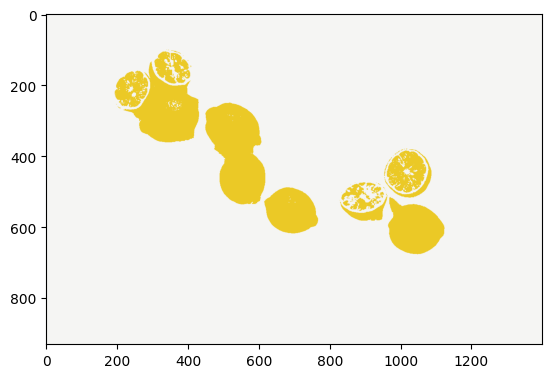

In [15]:
make_kmeans("data/img4.png", 2)